In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import risk_kit as rk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ind = rk.get_ind_returns()
er = rk.annualized_return(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [6]:
from scipy.optimize import minimize

def msr(riskfree_rate, er, cov):
    """
    riskfree_rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1 / n, n)
    bounds = ((0., 1.),) * n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = rk.portfolio_return(weights, er)
        vol = rk.portolio_volatility(weights, cov)
        return -(r - riskfree_rate) / vol
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(riskfree_rate, er, cov,), method="SLSQP",
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds)
    return results.x

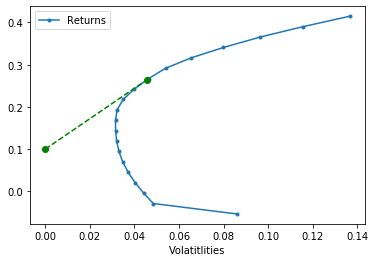

In [9]:
ax = rk.plot_ef(20, er, cov)

rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = rk.portfolio_return(w_msr, er)
vol_msr = rk.portolio_volatility(w_msr, cov)

# Add the Capital Market Line
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]

ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

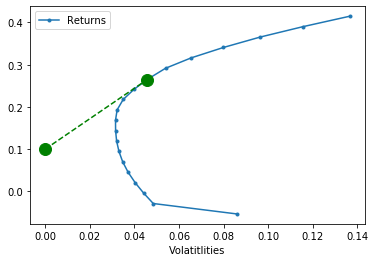

In [11]:
rk.plot_ef(20, er, cov, riskfree_rate=rf, show_cml=True)